In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F

from tqdm import trange

from poglm import model, utils

from importlib import reload
reload(model)
reload(utils)

In [2]:
decay = 0.25
window_size = 5
n_neurons = 5
n_vis_neurons = 3
basis = utils.exp_basis(decay, window_size, window_size)
n_time_bins = 100
n_samples = 60 # same number of sequences for train and test
n_samples_train = 40
n_trials = 10

In [4]:
df = pd.DataFrame(index=np.arange(n_trials), columns=['gen_model', 'spikes_list_train', 'convolved_spikes_list_train', 'firing_rates_list_train', 'spikes_list_test', 'convolved_spikes_list_test', 'firing_rates_list_test'])

for trial in trange(n_trials):
    torch.manual_seed(trial)
    
    gen_model = model.POGLM(n_neurons, n_vis_neurons, basis)
    with torch.no_grad():
        gen_model.linear.weight.data = torch.rand((n_neurons, n_neurons)) * 4 - 2
#         gen_model.linear.weight.data = torch.randn((n_neurons, n_neurons)) * 0.1
        gen_model.linear.bias.data = torch.rand(n_neurons) * 1 - 0.5
#         gen_model.linear.bias.data = torch.zeros(n_neurons)
    
    df.at[trial, 'gen_model'] = gen_model.state_dict()
    
    spikes_list, convolved_spikes_list, firing_rates_list = gen_model.sample(n_time_bins, n_samples)
    df.at[trial, 'spikes_list_train'] = spikes_list[:n_samples_train]
    df.at[trial, 'convolved_spikes_list_train'] = convolved_spikes_list[:n_samples_train]
    df.at[trial, 'firing_rates_list_train'] = firing_rates_list[:n_samples_train]
    df.at[trial, 'spikes_list_test'] = spikes_list[n_samples_train:]
    df.at[trial, 'convolved_spikes_list_test'] = convolved_spikes_list[n_samples_train:]
    df.at[trial, 'firing_rates_list_test'] = firing_rates_list[n_samples_train:]

100%|██████████| 10/10 [00:01<00:00,  7.16it/s]


In [32]:
df.to_pickle('data.pkl')

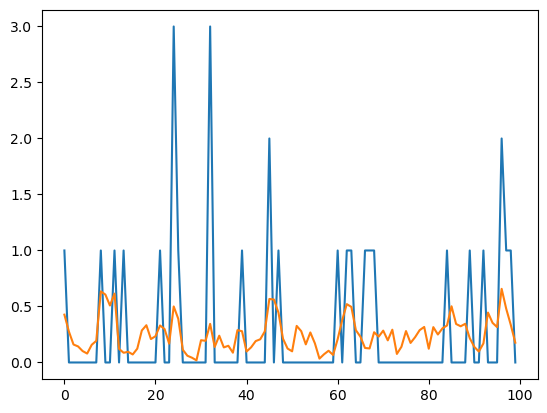

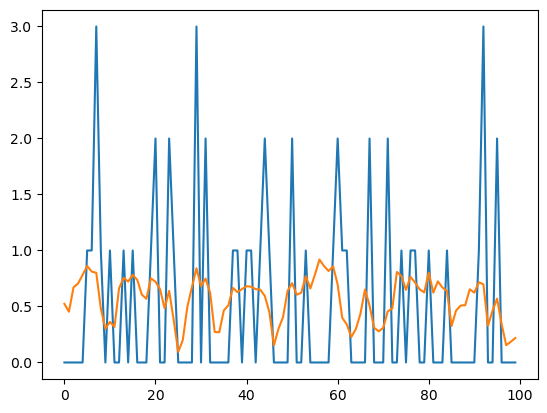

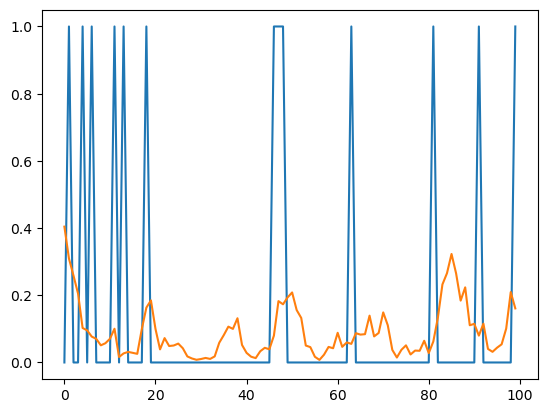

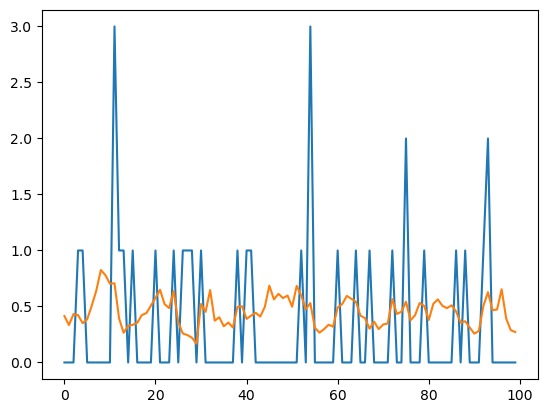

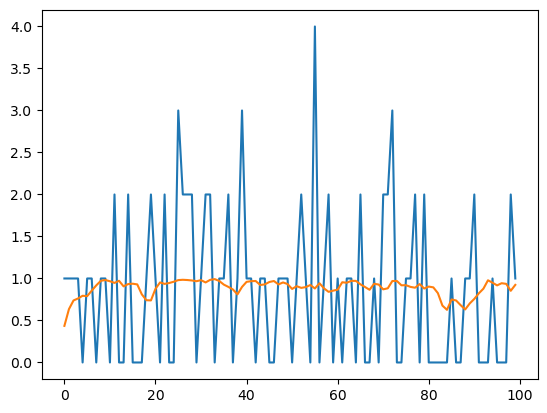

In [9]:
trial = 0
sample = 0
for i in range(5):
    plt.figure()
    plt.plot(df.at[trial, 'spikes_list_train'][sample][:, i])
    plt.plot(df.at[trial, 'firing_rates_list_train'][sample][:, i])

In [6]:
for trial in range(n_trials):
    print(df.at[trial, 'gen_model']['linear.weight'].abs().mean().item())

1.1048789024353027
1.1055817604064941
0.8555684685707092
0.9771379232406616
1.2907730340957642
1.0858018398284912
0.9498765468597412
1.0446903705596924
1.0598102807998657
0.9531906247138977


In [7]:
df.at[trial, 'gen_model']['linear.bias']

tensor([-0.1951, -0.1023, -0.1766, -0.4475,  0.1908])